### CREDIT CARD FRAUD DETECTION

#### Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

#### Loading the dataset

In [2]:
dataframe = pd.read_csv('creditcard_data.csv')

In [3]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Explorartory Data Analysis

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dataframe.shape

(284807, 31)

In [6]:
# Checking for duplicate values in the dataset
duplicate_rows = dataframe[dataframe.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape )

Number of duplicate rows:  (1081, 31)


In [7]:
# Removing the duplicate values
dataframe = dataframe.drop_duplicates()
print(dataframe.shape)

(283726, 31)


In [8]:
# Verifying the result
duplicate_rows = dataframe[dataframe.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape )

Number of duplicate rows:  (0, 31)


In [9]:
dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


#### Fraud and Non-Fraud Transactions

In [10]:
print('Legit Transactions:', round(dataframe['Class'].value_counts()[0]/len(dataframe) * 100,2),'%')
print('Frauds Transactions:', round(dataframe['Class'].value_counts()[1]/len(dataframe) * 100,2),'%')
# the classes are heavily skewed we need to solve this issue later

Legit Transactions: 99.83 %
Frauds Transactions: 0.17 %


In [11]:
# Thre are no null values in our dataset

dataframe.isnull().sum().sum()

0

In [12]:
# Let us know the columns present in our dataset

dataframe.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The information about frauds is present in the class column. To undestand the nature of this column we plot a graph of its two different values.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

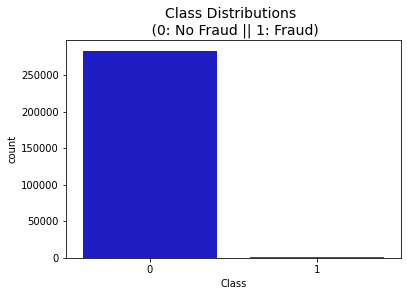

In [13]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=dataframe, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

We can notice that the dataset is highly imbalanced.
Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud.

#### Scaling of Time and Amount

In [14]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataframe['scaled_amount'] = rob_scaler.fit_transform(dataframe['Amount'].values.reshape(-1,1))
dataframe['scaled_time'] = rob_scaler.fit_transform(dataframe['Time'].values.reshape(-1,1))

dataframe.drop(['Time','Amount'], axis=1, inplace=True)

In [15]:
scaled_amount = dataframe['scaled_amount']
scaled_time = dataframe['scaled_time']

dataframe.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dataframe.insert(0, 'scaled_amount', scaled_amount)
dataframe.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

dataframe.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [16]:
# The value of fraud and non-fraud transactions have a huge gap

dataframe.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

As the values are very different therefore we cannot perform the regression on this data and we need to make a sample which has the data of both fraud and non-fraud values equally.

#### Sub-sampling of data

In [17]:
# Creating a sample

dataframe = dataframe.sample(frac=1)

# amount of fraud classes 492 rows.

fraud_df = dataframe.loc[dataframe['Class'] == 1]
non_fraud_df = dataframe.loc[dataframe['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows

new_df = normal_distributed_df.sample(frac=1, random_state=42)

In [18]:
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
195577,-0.167849,0.545713,-0.347634,0.489463,0.469269,-0.288940,-0.116585,-0.079291,-0.281489,0.544185,...,-0.151930,0.386510,1.088950,0.041718,0.636923,-1.131445,0.490658,0.112988,0.168799,0
623,7.050480,-0.989744,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
8615,-0.292032,-0.858629,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1
57248,-0.200528,-0.433248,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,...,-0.268347,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,1
15751,1.084550,-0.675794,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,...,1.649202,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,1


#### Equally Distributing and Correlating

Distribution of the Classes in the subsample dataset
Class
0    0.509845
1    0.490155
Name: count, dtype: float64


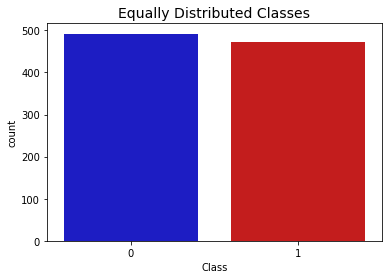

In [19]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

# We now have the data equally distributed in the Class

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

#### Correlation Analysis of the original dataframe

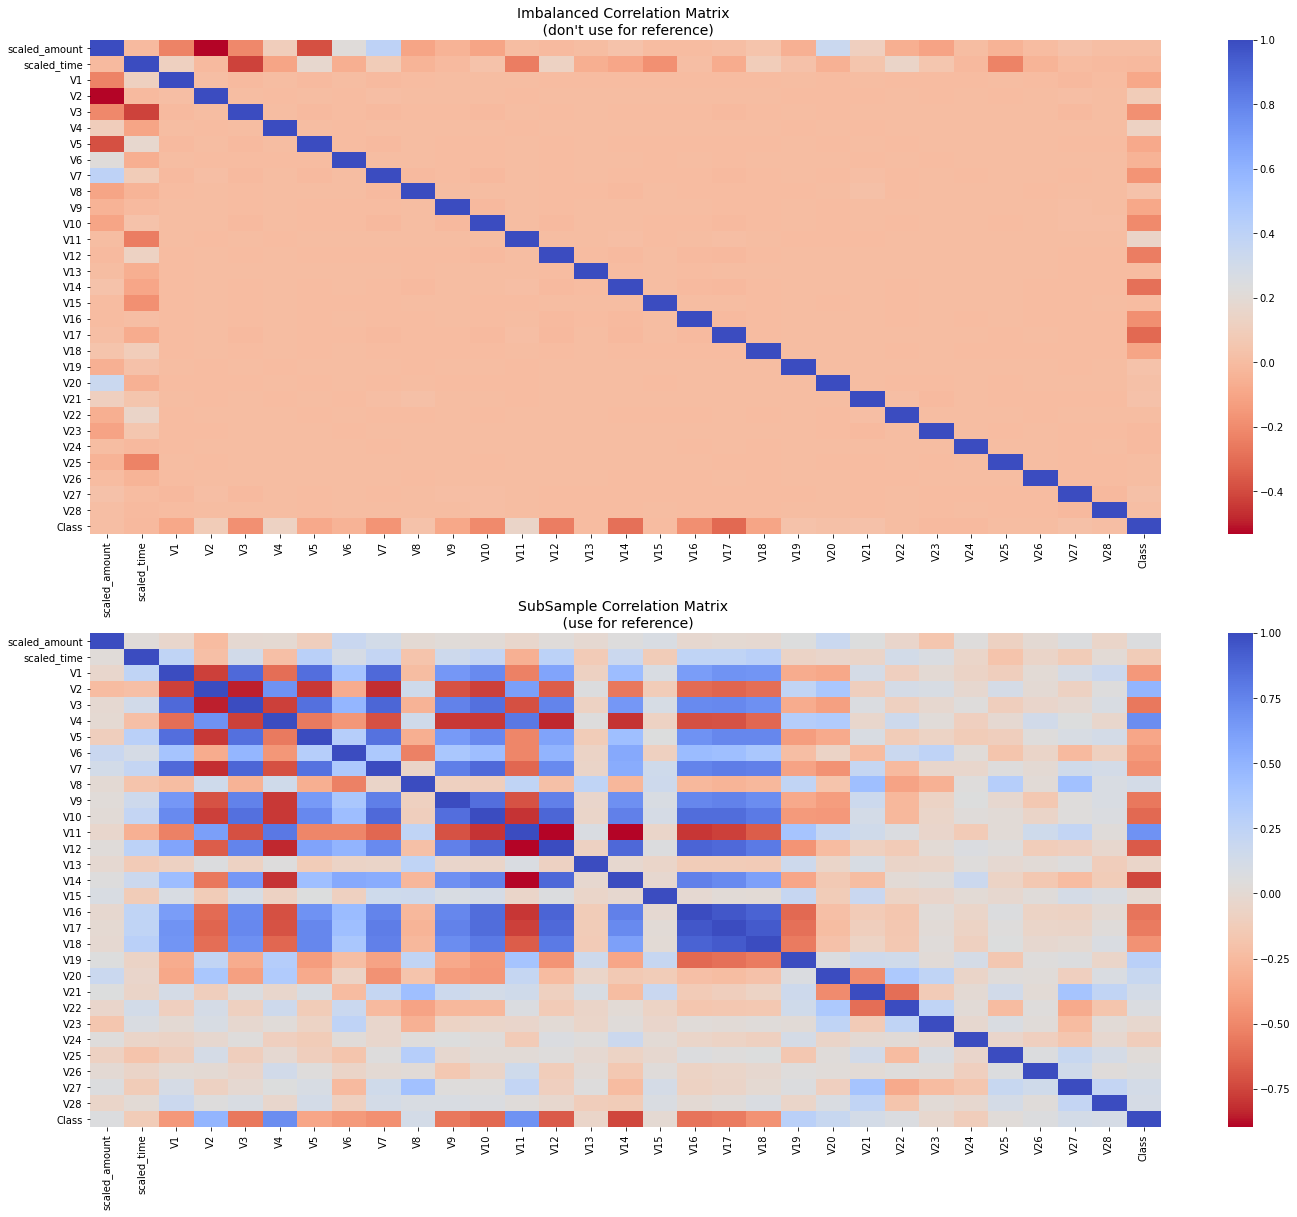

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = dataframe.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# The new dataframe
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

#### Box plot for negative and positive correlations

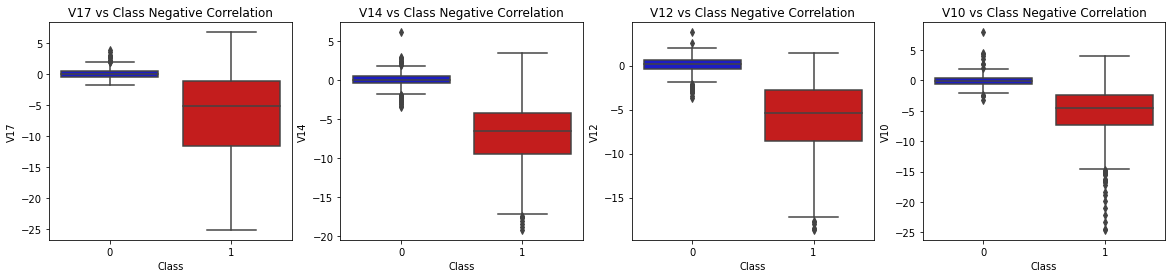

In [21]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class - The lower our feature value the more likely it will be a fraud transaction

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

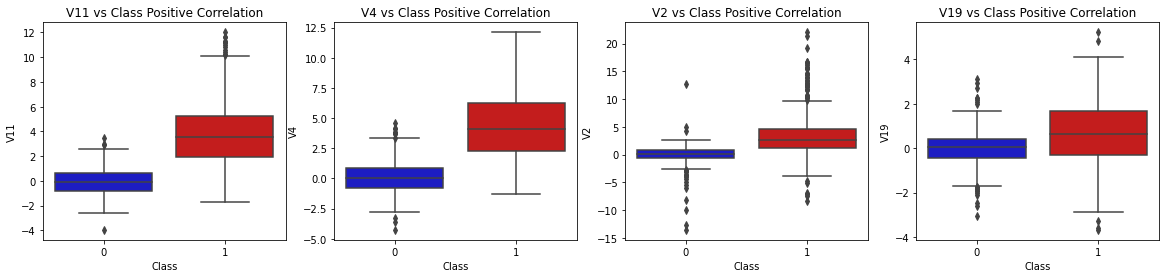

In [22]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

#### Regression on the sub-sampled dataset

In [23]:
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
195577,-0.167849,0.545713,-0.347634,0.489463,0.469269,-0.288940,-0.116585,-0.079291,-0.281489,0.544185,...,-0.151930,0.386510,1.088950,0.041718,0.636923,-1.131445,0.490658,0.112988,0.168799,0
623,7.050480,-0.989744,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
8615,-0.292032,-0.858629,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1
57248,-0.200528,-0.433248,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,...,-0.268347,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,1
15751,1.084550,-0.675794,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,...,1.649202,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,1


In [24]:
new_df.keys()

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

#### Splitting the data

In [25]:
# Splitting the data in the x and y parametrs.
# x is the parameters to be feeded in the model for prediction.
# y is the prediction values.

x = new_df.drop(columns = ['Class'], axis = 1)
y = new_df['Class']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)
print(X_train.shape , X_test.shape)

(772, 30) (193, 30)


#### Logistic Regression

In [27]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

#### Accuracy Score

In [28]:
y_pred = model.predict(X_test)
print("Accuracy score:",(round(accuracy_score(Y_test, y_pred)*100, 2)),'%')

Accuracy score: 96.37 %


In [29]:
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, x_train_prediction)
print('Training Data Accuracy : ', training_data_accuracy)

Training Data Accuracy :  0.9468911917098446


In [30]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Testing Data Accuracy:', testing_data_accuracy)

Testing Data Accuracy: 0.9637305699481865


#### Confusion matrix

[Text(0, 0.5, ''), Text(0, 1.5, '')]

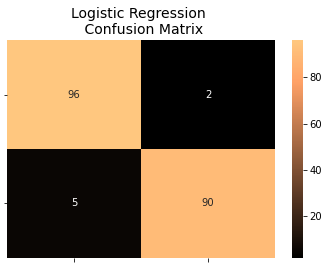

In [31]:
log_reg_cf = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.copper)
ax.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax.set_yticklabels(['', ''], fontsize=14, rotation=360)

#### Classification Report

In [32]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.98      0.95      0.96        95

    accuracy                           0.96       193
   macro avg       0.96      0.96      0.96       193
weighted avg       0.96      0.96      0.96       193



#### Test Case

In [33]:
input_data = x[6:7]
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0] == 0):
  print("This isn't a fraud transaction")
else:
  print("The is a fraud transaction")

[1]
The is a fraud transaction


In [34]:
# Verifying our prediction

output_data = y[6:7]
output_data

143335    1
Name: Class, dtype: int64

In [35]:
import pickle

In [36]:
filename = 'ccfd_model.sav'
pickle.dump(model, open(filename, 'wb'))